# Análise Exploratória de Nascimentos nos EUA
Análise dos nascimentos ocorridos nos Estados Unidos

In [18]:
#Importando bibliotecas necessárias para as análises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [19]:
#Importando base de dados
births = pd.read_csv("births.csv")
print(births.head())

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [20]:
# Renomeando as colunas para facilitar as análises
baseNascimentos = births.rename(columns={'year':'ano',
                                    'month':'mes',
                                    'day':'dia',
                                    'gender':'gênero',
                                    'births' : 'nascimentos'})

In [21]:
#Realizando tratamento dos dados
baseNascimentos['dia'].fillna(0, inplace=True)
baseNascimentos['dia'] = baseNascimentos['dia'].astype(int)

In [22]:
#Criando pivot table
baseNascimentos['decada'] = 10 * (baseNascimentos['ano'] // 10)
baseNascimentos.pivot_table('nascimentos', index='decada', columns='gênero', aggfunc='sum')
print(baseNascimentos.head())

    ano  mes  dia gênero  nascimentos  decada
0  1969    1    1      F         4046    1960
1  1969    1    1      M         4440    1960
2  1969    1    2      F         4454    1960
3  1969    1    2      M         4548    1960
4  1969    1    3      F         4548    1960


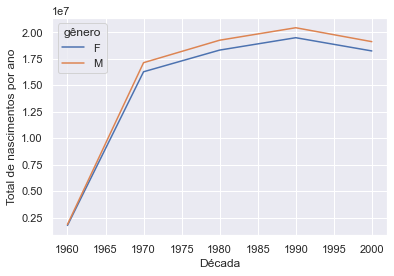

<Figure size 432x288 with 0 Axes>

In [23]:
#Gerando gráfico da evolução da taxa de nascimentos por ano
sns.set()
Nascimentos_decada = baseNascimentos.pivot_table('nascimentos', index='decada', columns='gênero', aggfunc='sum')
Nascimentos_decada.plot()
plt.xlabel("Década")
plt.ylabel("Total de nascimentos por ano")
plt.show()
plt.savefig('g1.jpeg')

In [24]:
quartiles = np.percentile(baseNascimentos['nascimentos'], [25, 50, 75])
mean = quartiles[1]
sigma = 0.74 * (quartiles[2] - quartiles[0])

In [25]:
baseNascimentos = baseNascimentos.query('(nascimentos > @mean - 5 * @sigma) & (nascimentos < @mean + 5 * @sigma)')
baseNascimentos.index = pd.to_datetime(10000 * baseNascimentos.ano + 100 * baseNascimentos.mes + baseNascimentos.dia,
                              format='%Y%m%d')
baseNascimentos['dia da semana'] = baseNascimentos.index.dayofweek

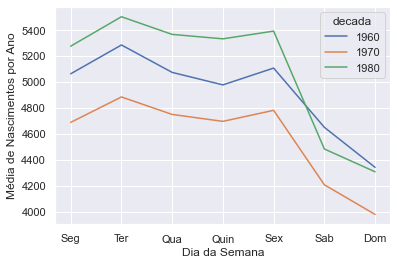

In [26]:
#criando pivot table da base de dados
Nascimentos_dia = baseNascimentos.pivot_table('nascimentos', index='dia da semana',
                                columns='decada', aggfunc='mean')
Nascimentos_dia.index = ['Seg', 'Ter', 'Qua', 'Quin', 'Sex', 'Sab', 'Dom']
Nascimentos_dia.plot()
plt.ylabel("Média de Nascimentos por Ano")
plt.xlabel("Dia da Semana")
plt.show()

In [27]:
#Criando pivot table
Nascimentos_mes = baseNascimentos.pivot_table('nascimentos', [baseNascimentos.index.month, baseNascimentos.index.day])
print(Nascimentos_mes.head())

Nascimentos_mes.index = [pd.datetime(2012, month, day)
                      for (month, day) in Nascimentos_mes.index]
print(Nascimentos_mes.head())


     nascimentos
1 1     4009.225
  2     4247.400
  3     4500.900
  4     4571.350
  5     4603.625
            nascimentos
2012-01-01     4009.225
2012-01-02     4247.400
2012-01-03     4500.900
2012-01-04     4571.350
2012-01-05     4603.625


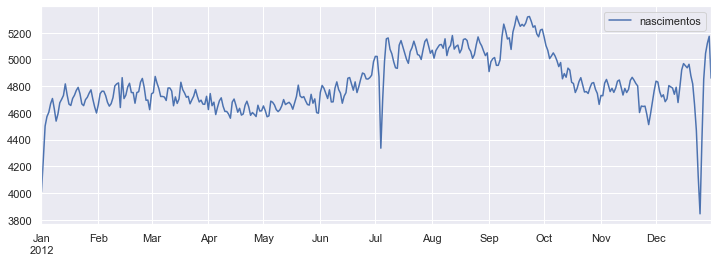

In [28]:
fig, ax = plt.subplots(figsize=(12, 4))
Nascimentos_mes.plot(ax=ax)
plt.show()